<a href="https://colab.research.google.com/github/Theresa26/Complete-Python-3-Bootcamp/blob/master/550_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea: Podcast dataset and reviews

Link to the 3 json datasets: 
https://www.kaggle.com/datasets/thoughtvector/podcastreviews

Resources: 

*   https://developer.spotify.com/documentation/web-api
*   https://developer.spotify.com/blog/2020-03-20-introducing-podcasts-api
*   https://github.com/spotipy-dev/spotipy
*   https://github.com/spotipy-dev/spotipy/commit/dd69a4865962c080635eccafd0b67b9732f55323
*   https://spotipy.readthedocs.io/en/2.22.1/
*   Example of using spotify to search for podcast data: https://medium.com/analytics-vidhya/visualizing-spotify-podcast-data-6dce49ca9a43



In [2]:
# imports 
import pandas as pd 
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyOAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="",
                                               client_secret="",
                                               redirect_uri="http://localhost:3000",
                                               scope="user-library-read"))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Testing spotify API using Spotipy package

In [3]:
# test 
#taylor_uri = 'spotify:artist:06HL4z0CvFAxyc27GXpf02'
#results = sp.artist_albums(taylor_uri, album_type='album')
#albums = results['items']
#while results['next']:
#    results = sp.next(results)
#    albums.extend(results['items'])
#for album in albums:
#    print(album['name'])

KeyboardInterrupt: ignored

In [ ]:
# searching for a specific category (testing: technology)
# https://developer.spotify.com/documentation/web-api/reference/search
# requires: 
# q (available filters: album, artist, track, year, upc, tag:hipster, tag:new, isrc, and genre.)
# type ("album", "artist", "playlist", "track", "show", "episode", "audiobook"), 
# market (ISO code or can be None),
# limit (max number of results to return in each item type) between 0-50 - default 20
# offset (index of first result to return, default 0, range 0-1000)

Helpful podcast API commands for setting up and creating our dataset on podcasts from the spotify API:

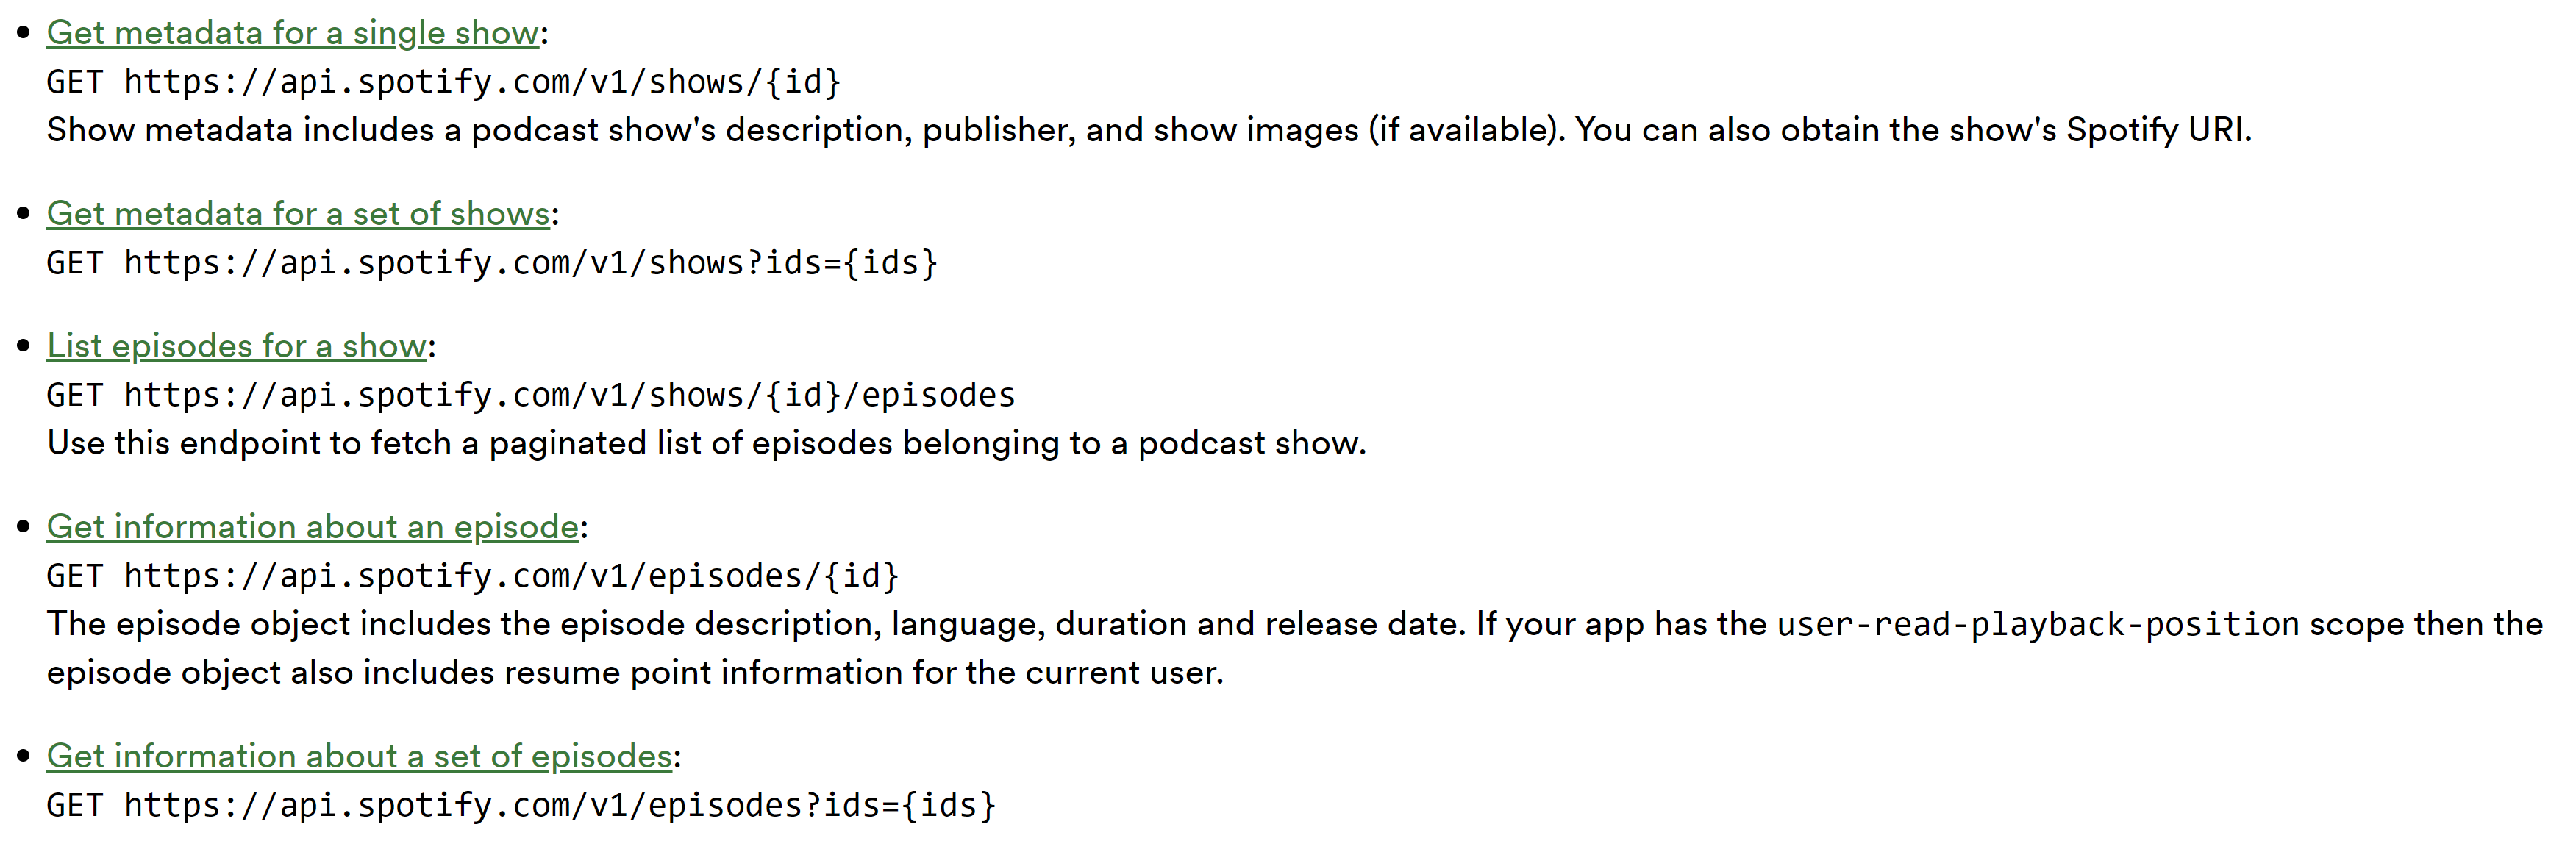

# Importing Datasets

In [4]:
# importing the datasets
itunes_categories = pd.read_json('/content/categories.json', lines=True)
itunes_podcasts = pd.read_json('/content/podcasts.json', lines=True)
itunes_reviews1 = pd.read_json('/content/1.json' , lines=True)
itunes_reviews2 = pd.read_json('/content/2.json' , lines=True)
itunes_reviews3 = pd.read_json('/content/3.json' , lines=True)
#itunes_reviews4 = pd.read_json('/content/4.json' , lines=True)
#itunes_reviews5 = pd.read_json('/content/5.json' , lines=True)
#itunes_reviews6 = pd.read_json('/content/6.json' , lines=True)
#itunes_reviews7 = pd.read_json('/content/7.json' , lines=True)


In [5]:
# concat the reviews
itunes_reviews = pd.concat([itunes_reviews1, itunes_reviews2, itunes_reviews3])

#High level EDA on datasets:

## Categories

In [6]:
# attributes: podcast_id,	itunes_id,	category
itunes_categories.head()

,podcast_id,itunes_id,category
0,943d1c4349913bde09ef82b69f83cfdf,1446474395,education
1,f53f27d03cdc5040ab4fd2ea30e3dd4f,840646770,society-culture
2,49fa5f1097ae9046ce1a0c56e31b533c,1541959455,arts-performing-arts
3,dbe2dc5aa097523aa294a3b659293af4,1146609744,tv-film
4,2349ed9d26f16029cfc69902bf319ca5,1475252651,education


In [7]:
# not really interesting
itunes_categories.describe()

,itunes_id
count,3.706368e+06
mean,1.424082e+09
std,2.777828e+08
min,7.332924e+07
25%,1.466020e+09
50%,1.520767e+09
75%,1.553224e+09
max,1.666196e+09


In [9]:
# unique values 
categories = itunes_categories.category.unique()
print(len(categories))
print(categories)

110
['education' 'society-culture' 'arts-performing-arts' 'tv-film' 'arts'
 'business' 'technology' 'education-self-improvement' 'fiction'
 'religion-spirituality' 'education-how-to' 'christianity' 'government'
 'education-language-learning' 'arts-fashion-beauty' 'arts-visual-arts'
 'business-careers' 'arts-design' 'society-culture-personal-journals'
 'kids-family' 'comedy' 'business-investing' 'society-culture-philosophy'
 'music' 'health-fitness' 'society-culture-places-travel' 'spirituality'
 'arts-food' 'fiction-comedy-fiction' 'islam' 'fiction-drama' 'judaism'
 'fiction-science-fiction' 'hinduism' 'buddhism' 'leisure-games' 'sports'
 'business-entrepreneurship' 'leisure' 'arts-books'
 'kids-family-stories-for-kids' 'news' 'business-non-profit' 'science'
 'news-entertainment-news' 'leisure-video-games'
 'health-fitness-alternative-health' 'comedy-stand-up' 'history'
 'science-chemistry' 'sports-wilderness' 'health-fitness-mental-health'
 'true-crime' 'religion' 'comedy-improv' 'lei

In [10]:
# number of rows
len(itunes_categories.index)

3706368

In [19]:
# unique ids
len(itunes_categories.itunes_id.unique())

2064893

In [34]:
# check nulls
itunes_categories.isnull().sum()

podcast_id    0
itunes_id     0
category      0
dtype: int64

## Podcasts

In [11]:
# podcast_id	itunes_id	slug	itunes_url	title	author	description	average_rating	ratings_count	scraped_at
itunes_podcasts.head()

,podcast_id,itunes_id,slug,itunes_url,title,author,description,average_rating,ratings_count,scraped_at
0,d3997f1089be9e45fda4113be39765cb,1000000618,christianity-questions-and-answers,https://podcasts.apple.com/us/podcast/christia...,None,None,None,NaN,None,NaT
1,f201172864310534ae6b6c4f8ae9b8cc,1000016089,rahdo-talks-through,https://podcasts.apple.com/us/podcast/rahdo-ta...,Rahdo Talks Through,noreply@blogger.com (Richard Ham),"Richard ""Rahdo"" Ham talks (at great length) al...",4.6,60,2019-07-08 06:15:45.106345
2,4e5ce6a47e5d491aac3f588cfb3ece73,1000016800,st-neots-evangelical-church-sermons,https://podcasts.apple.com/us/podcast/st-neots...,None,None,None,NaN,None,NaT
3,6c476d3dd90c3fe5381153354b326952,1000035657,idiotspeakshow,https://podcasts.apple.com/us/podcast/idiotspe...,IdiotSpeakShow,IdiotSpeakShow,Podcast by IdiotSpeakShow,NaN,None,2019-07-08 06:01:23.683147
4,b9e7fdf5cd545fc8097055e2f2f1d760,1000035702,conciertos-en-el-living,https://podcasts.apple.com/us/podcast/conciert...,None,None,None,NaN,None,NaT


In [12]:
itunes_podcasts.describe()

,itunes_id,average_rating
count,2.077665e+06,82988.000000
mean,1.424660e+09,4.709076
std,2.764353e+08,0.625235
min,7.332924e+07,1.000000
25%,1.462581e+09,4.700000
50%,1.520676e+09,5.000000
75%,1.553498e+09,5.000000
max,1.666196e+09,5.000000


In [23]:
# number of rows
len(itunes_podcasts.index)

2077665

In [18]:
# confirm unique podcast ids
len(itunes_podcasts.itunes_id.unique())

2077665

In [35]:
itunes_podcasts.isnull().sum()

podcast_id              0
itunes_id               0
slug                    0
itunes_url              0
title             1923844
author            1923844
description       1927857
average_rating    1994677
ratings_count     1994677
scraped_at        1923844
dtype: int64

## Review overlap between the podcasts and categories

In [25]:
# overlap between podcasts and categories
combined = itunes_podcasts.merge(itunes_categories, on=['podcast_id', 'itunes_id'], how='left', indicator=True)

In [26]:
combined.head()

,podcast_id,itunes_id,slug,itunes_url,title,author,description,average_rating,ratings_count,scraped_at,category,_merge
0,d3997f1089be9e45fda4113be39765cb,1000000618,christianity-questions-and-answers,https://podcasts.apple.com/us/podcast/christia...,None,None,None,NaN,None,NaT,religion-spirituality,both
1,d3997f1089be9e45fda4113be39765cb,1000000618,christianity-questions-and-answers,https://podcasts.apple.com/us/podcast/christia...,None,None,None,NaN,None,NaT,christianity,both
2,f201172864310534ae6b6c4f8ae9b8cc,1000016089,rahdo-talks-through,https://podcasts.apple.com/us/podcast/rahdo-ta...,Rahdo Talks Through,noreply@blogger.com (Richard Ham),"Richard ""Rahdo"" Ham talks (at great length) al...",4.6,60,2019-07-08 06:15:45.106345,leisure-games,both
3,f201172864310534ae6b6c4f8ae9b8cc,1000016089,rahdo-talks-through,https://podcasts.apple.com/us/podcast/rahdo-ta...,Rahdo Talks Through,noreply@blogger.com (Richard Ham),"Richard ""Rahdo"" Ham talks (at great length) al...",4.6,60,2019-07-08 06:15:45.106345,leisure,both
4,4e5ce6a47e5d491aac3f588cfb3ece73,1000016800,st-neots-evangelical-church-sermons,https://podcasts.apple.com/us/podcast/st-neots...,None,None,None,NaN,None,NaT,religion-spirituality,both


In [33]:
# podcast ids in both 
len(combined[combined._merge == 'both']) # 3589629 (one podcast can be matched to multiple categories)
len(combined[combined._merge == 'both'].itunes_id.unique()) # 2064893 unique itunes id
len(combined[combined._merge == 'both'].podcast_id.unique()) # 2064893 unique podcast id

2064893

--> all itunes IDs in the categories data set are matched to the ones in the podcast dataset

## Reviews (subset of entire data set)

Without having subsets in total 5607021 rows and
561 subfiles if split into chunks of 10k

In [14]:
# podcast_id	title	content	rating	author_id	created_at
itunes_reviews.head()

,podcast_id,title,content,rating,author_id,created_at
0,52e3d2c4fab4e80a8bb75ad144671d96,Argh,What the heck is this show? And why can’t I de...,1,a23655ce5565f32,2019-05-01 01:24:01+00:00
1,52e3d2c4fab4e80a8bb75ad144671d96,Miss gross overrated as interviewer.,The Howard stern interview was horrible. I lea...,1,e5d461c5f91c8d2,2019-06-07 14:25:34+00:00
2,52e3d2c4fab4e80a8bb75ad144671d96,I love Terri and Fresh Air,People get really pissy about this beautiful f...,5,806cc75442c8f3d,2019-05-15 09:42:53+00:00
3,52e3d2c4fab4e80a8bb75ad144671d96,Fresh Air subscription changes to Code Switch,I’ve been a subscriber to Fresh Air for over a...,4,3e1e7e8417a3e85,2019-05-06 02:39:10+00:00
4,52e3d2c4fab4e80a8bb75ad144671d96,Climate change,"Hello, my name is Lily Rudman and I am a fifth...",5,7c680144b582c6d,2019-04-18 00:37:51+00:00


In [15]:
itunes_reviews.describe()

,rating
count,450003.000000
mean,4.749955
std,0.844941
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
# number of rows (for subset)
len(itunes_reviews.index)

450003

In [32]:
# unique itunes ids used
len(itunes_reviews.podcast_id.unique())

18402

## Review dropping NAs

In [36]:
combined_cleaned = combined.dropna()

In [37]:
# rows
len(combined_cleaned.index)

165050

In [40]:
# unique podcast ids
len(combined_cleaned.podcast_id.unique())

75329

In [41]:
combined_cleaned.head()

,podcast_id,itunes_id,slug,itunes_url,title,author,description,average_rating,ratings_count,scraped_at,category,_merge
2,f201172864310534ae6b6c4f8ae9b8cc,1000016089,rahdo-talks-through,https://podcasts.apple.com/us/podcast/rahdo-ta...,Rahdo Talks Through,noreply@blogger.com (Richard Ham),"Richard ""Rahdo"" Ham talks (at great length) al...",4.6,60,2019-07-08 06:15:45.106345,leisure-games,both
3,f201172864310534ae6b6c4f8ae9b8cc,1000016089,rahdo-talks-through,https://podcasts.apple.com/us/podcast/rahdo-ta...,Rahdo Talks Through,noreply@blogger.com (Richard Ham),"Richard ""Rahdo"" Ham talks (at great length) al...",4.6,60,2019-07-08 06:15:45.106345,leisure,both
9,3cfef94cfccf27eb504bd7a6c7459636,1000035707,originall,https://podcasts.apple.com/us/podcast/original...,OriginALL,CityPodcast,OriginALL este un show cu oameni inteligenti p...,3.7,3,2019-07-08 08:49:41.523299,business-careers,both
10,3cfef94cfccf27eb504bd7a6c7459636,1000035707,originall,https://podcasts.apple.com/us/podcast/original...,OriginALL,CityPodcast,OriginALL este un show cu oameni inteligenti p...,3.7,3,2019-07-08 08:49:41.523299,business,both
14,9fc35a81647e391f93211b5d11973c83,1000081327,galaktacus,https://podcasts.apple.com/us/podcast/galaktac...,Galaktacus,"Jim Kettner, John Mihaly, and Scott Brown",The name Galaktacus originates from a youthful...,5.0,20,2019-07-09 16:22:01.395399,tv-film,both
